Tingkat kebahagiaan pelanggan: 72


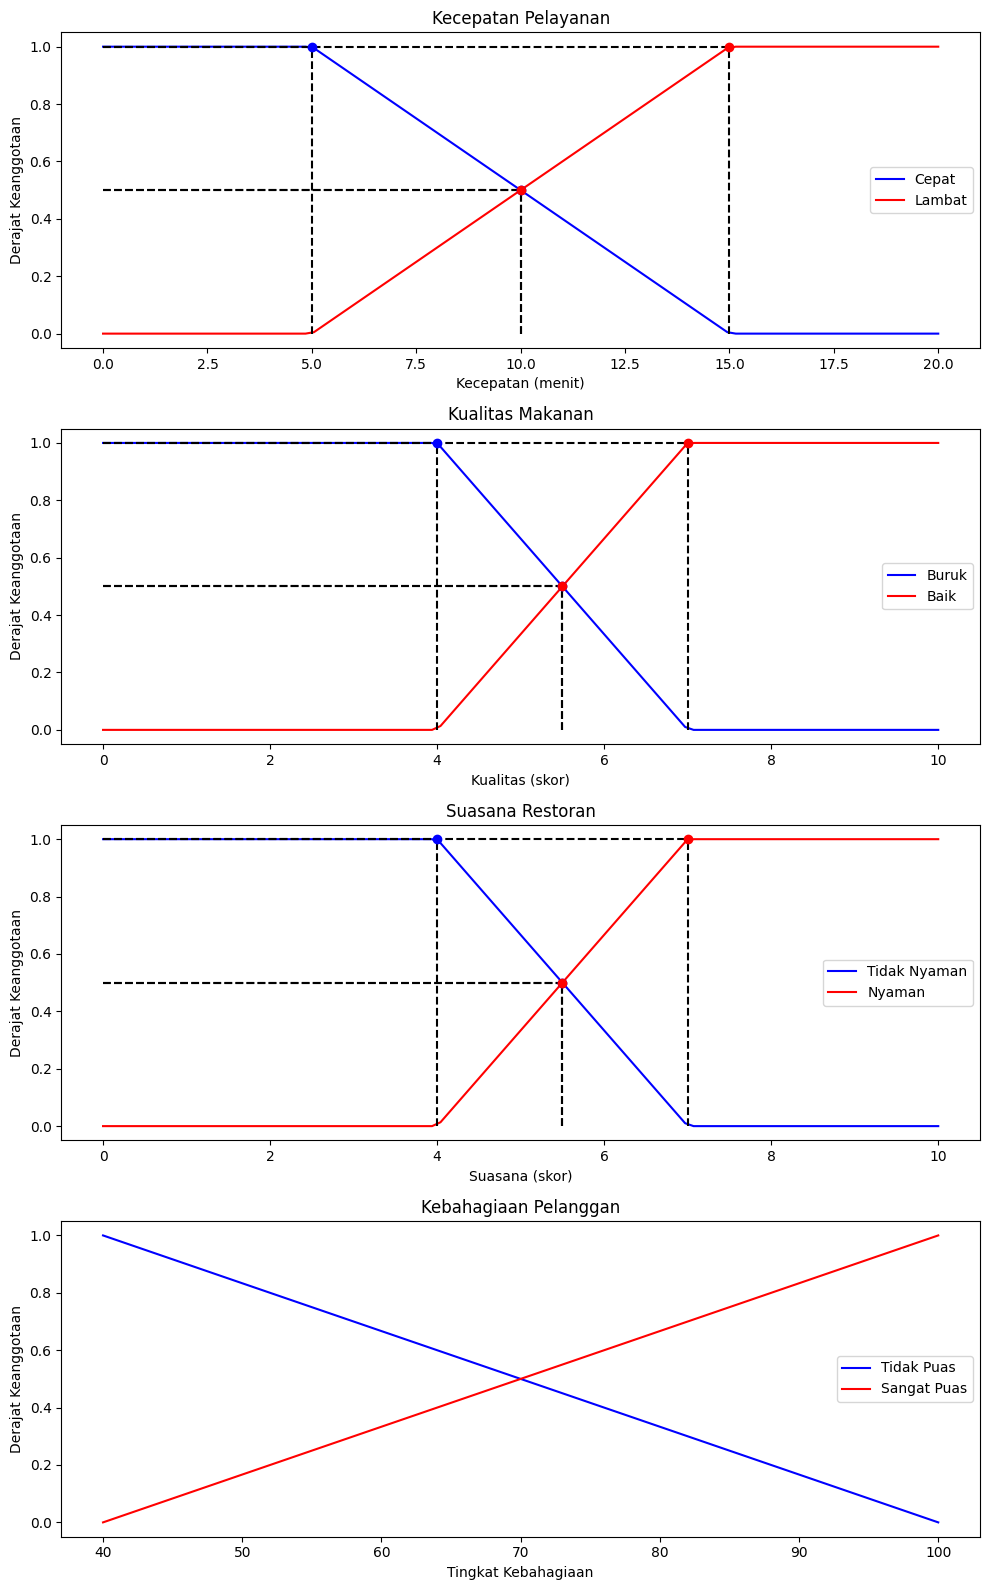

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Kelas Fuzzy
class Fuzzy:
    def __init__(self, nilai_min, nilai_maks):
        self.min = nilai_min
        self.max = nilai_maks

    def turun(self, x):
        return (self.max - x) / (self.max - self.min)

    def naik(self, x):
        return (x - self.min) / (self.max - self.min)

    def rev_turun(self, nilai_fuzzy):
        return self.max - nilai_fuzzy * (self.max - self.min)

    def rev_naik(self, nilai_fuzzy):
        return nilai_fuzzy * (self.max - self.min) + self.min

# Kelas turunan untuk Kecepatan, Kualitas, Suasana
class Kecepatan(Fuzzy):
    def __init__(self):
        super().__init__(5, 15)

    def cepat(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.turun(x)

    def lambat(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.naik(x)

class Kualitas(Fuzzy):
    def __init__(self):
        super().__init__(4, 7)

    def buruk(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.turun(x)

    def baik(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.naik(x)

class Suasana(Fuzzy):
    def __init__(self):
        super().__init__(4, 7)

    def tidak_nyaman(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.turun(x)

    def nyaman(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.naik(x)

# Kelas Kebahagiaan
class Kebahagiaan(Fuzzy):
    def __init__(self):
        self.min = 40  
        self.max = 100  

    def tidak_puas(self, nilai_fuzzy):
        return self.rev_turun(nilai_fuzzy)

    def sangat_puas(self, nilai_fuzzy):
        return self.rev_naik(nilai_fuzzy)

# Variabel Input
kecepatan = Kecepatan()
kualitas = Kualitas()
suasana = Suasana()
kebahagiaan = Kebahagiaan()

# Aturan Fuzzy
peta_aturan = {
    ("cepat", "baik", "nyaman"): "sangat_puas",
    ("cepat", "buruk", "tidak_nyaman"): "tidak_puas",
    ("lambat", "baik", "nyaman"): "tidak_puas",
    ("lambat", "buruk", "tidak_nyaman"): "tidak_puas",
    ("cepat", "baik", "tidak_nyaman"): "tidak_puas",
}

# Perhitungan
nilai_kecepatan = 10  # Kecepatan pelayanan (dalam menit)
nilai_kualitas = 8   # Kualitas makanan (skor)
nilai_suasana = 6   # Suasana restoran (skor)

jumlah_fuzzy_real = 0
jumlah_fuzzy = 0

for k, v in peta_aturan.items():
    fuzzy_kecepatan = getattr(kecepatan, k[0])(nilai_kecepatan)
    fuzzy_kualitas = getattr(kualitas, k[1])(nilai_kualitas)
    fuzzy_suasana = getattr(suasana, k[2])(nilai_suasana)

    fuzzy_output = min(fuzzy_kecepatan, fuzzy_kualitas, fuzzy_suasana)
    real_output = getattr(kebahagiaan, v)(fuzzy_output)

    jumlah_fuzzy_real += fuzzy_output * real_output
    jumlah_fuzzy += fuzzy_output

hasil = int(jumlah_fuzzy_real / jumlah_fuzzy)
print(f"Tingkat kebahagiaan pelanggan: {hasil}")

# Visualisasi
# Range untuk x (kecepatan pelayanan, kualitas, suasana restoran)
data_kecepatan = np.linspace(0, 20, 100)
data_kualitas = np.linspace(0, 10, 100)
data_suasana = np.linspace(0, 10, 100)

# Data nilai fuzzy untuk Kebahagiaan
nilai_fuzzy = np.linspace(0, 1, 100)
nilai_tidak_puas = [kebahagiaan.tidak_puas(nf) for nf in nilai_fuzzy]
nilai_sangat_puas = [kebahagiaan.sangat_puas(nf) for nf in nilai_fuzzy]

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(10, 16))

# Plot untuk Kecepatan
axs[0].plot(data_kecepatan, [kecepatan.cepat(x) for x in data_kecepatan], label='Cepat', color='blue')
axs[0].plot(data_kecepatan, [kecepatan.lambat(x) for x in data_kecepatan], label='Lambat', color='red')

# Menambahkan titik koordinat dan garis putus-putus
axs[0].scatter(5, kecepatan.cepat(5), color='blue', zorder=5)
axs[0].plot([5, 5], [0, kecepatan.cepat(5)], 'k--')  # Garis putus-putus ke sumbu y
axs[0].plot([0, 5], [kecepatan.cepat(5), kecepatan.cepat(5)], 'k--')  # Garis putus-putus ke sumbu x

axs[0].scatter(15, kecepatan.lambat(15), color='red', zorder=5)
axs[0].plot([15, 15], [0, kecepatan.lambat(15)], 'k--')
axs[0].plot([0, 15], [kecepatan.lambat(15), kecepatan.lambat(15)], 'k--')

axs[0].scatter(10, kecepatan.cepat(10), color='blue', zorder=5)
axs[0].plot([10, 10], [0, kecepatan.cepat(10)], 'k--')
axs[0].plot([0, 10], [kecepatan.cepat(10), kecepatan.cepat(10)], 'k--')

axs[0].scatter(10, kecepatan.lambat(10), color='red', zorder=5)
axs[0].plot([10, 10], [0, kecepatan.lambat(10)], 'k--')
axs[0].plot([0, 10], [kecepatan.lambat(10), kecepatan.lambat(10)], 'k--')

axs[0].set_title('Kecepatan Pelayanan')
axs[0].set_xlabel('Kecepatan (menit)')
axs[0].set_ylabel('Derajat Keanggotaan')
axs[0].legend()

# Plot untuk Kualitas
axs[1].plot(data_kualitas, [kualitas.buruk(x) for x in data_kualitas], label='Buruk', color='blue')
axs[1].plot(data_kualitas, [kualitas.baik(x) for x in data_kualitas], label='Baik', color='red')

# Menambahkan titik koordinat dan garis putus-putus
axs[1].scatter(4, kualitas.buruk(4), color='blue', zorder=5)
axs[1].plot([4, 4], [0, kualitas.buruk(4)], 'k--')
axs[1].plot([0, 4], [kualitas.buruk(4), kualitas.buruk(4)], 'k--')

axs[1].scatter(7, kualitas.baik(7), color='red', zorder=5)
axs[1].plot([7, 7], [0, kualitas.baik(7)], 'k--')
axs[1].plot([0, 7], [kualitas.baik(7), kualitas.baik(7)], 'k--')

axs[1].scatter(5.5, kualitas.buruk(5.5), color='blue', zorder=5)
axs[1].plot([5.5, 5.5], [0, kualitas.buruk(5.5)], 'k--')
axs[1].plot([0, 5.5], [kualitas.buruk(5.5), kualitas.buruk(5.5)], 'k--')

axs[1].scatter(5.5, kualitas.baik(5.5), color='red', zorder=5)
axs[1].plot([5.5, 5.5], [0, kualitas.baik(5.5)], 'k--')
axs[1].plot([0, 5.5], [kualitas.baik(5.5), kualitas.baik(5.5)], 'k--')

axs[1].set_title('Kualitas Makanan')
axs[1].set_xlabel('Kualitas (skor)')
axs[1].set_ylabel('Derajat Keanggotaan')
axs[1].legend()

# Plot untuk Suasana
axs[2].plot(data_suasana, [suasana.tidak_nyaman(x) for x in data_suasana], label='Tidak Nyaman', color='blue')
axs[2].plot(data_suasana, [suasana.nyaman(x) for x in data_suasana], label='Nyaman', color='red')

# Menambahkan titik koordinat dan garis putus-putus
axs[2].scatter(4, suasana.tidak_nyaman(4), color='blue', zorder=5)
axs[2].plot([4, 4], [0, suasana.tidak_nyaman(4)], 'k--')
axs[2].plot([0, 4], [suasana.tidak_nyaman(4), suasana.tidak_nyaman(4)], 'k--')

axs[2].scatter(7, suasana.nyaman(7), color='red', zorder=5)
axs[2].plot([7, 7], [0, suasana.nyaman(7)], 'k--')
axs[2].plot([0, 7], [suasana.nyaman(7), suasana.nyaman(7)], 'k--')

axs[2].scatter(5.5, suasana.tidak_nyaman(5.5), color='blue', zorder=5)
axs[2].plot([5.5, 5.5], [0, suasana.tidak_nyaman(5.5)], 'k--')
axs[2].plot([0, 5.5], [suasana.tidak_nyaman(5.5), suasana.tidak_nyaman(5.5)], 'k--')

axs[2].scatter(5.5, suasana.nyaman(5.5), color='red', zorder=5)
axs[2].plot([5.5, 5.5], [0, suasana.nyaman(5.5)], 'k--')
axs[2].plot([0, 5.5], [suasana.nyaman(5.5), suasana.nyaman(5.5)], 'k--')

axs[2].set_title('Suasana Restoran')
axs[2].set_xlabel('Suasana (skor)')
axs[2].set_ylabel('Derajat Keanggotaan')
axs[2].legend()

# Plot untuk Kebahagiaan
axs[3].plot(nilai_tidak_puas, nilai_fuzzy, label='Tidak Puas', color='blue')
axs[3].plot(nilai_sangat_puas, nilai_fuzzy, label='Sangat Puas', color='red')
axs[3].set_title('Kebahagiaan Pelanggan')
axs[3].set_xlabel('Tingkat Kebahagiaan')
axs[3].set_ylabel('Derajat Keanggotaan')
axs[3].legend()

plt.tight_layout()
plt.show()

In [14]:
from pptx import Presentation
from pptx.util import Inches

# Buat objek presentasi
prs = Presentation()

# Tambahkan slide judul
slide_title = prs.slides.add_slide(prs.slide_layouts[0])
title = slide_title.shapes.title
subtitle = slide_title.placeholders[1]
title.text = "Analisis Kebahagiaan Pelanggan"
subtitle.text = "Menggunakan Logika Fuzzy"

# Tambahkan slide untuk input
slide_input = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_input.shapes.title
content = slide_input.placeholders[1]
title.text = "Input"
content.text = (
    "Kecepatan Pelayanan: 10 menit\n"
    "Kualitas Makanan: 8 (skor)\n"
    "Suasana Restoran: 6 (skor)"
)

# Tambahkan slide untuk perhitungan derajat keanggotaan
slide_membership = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_membership.shapes.title
content = slide_membership.placeholders[1]
title.text = "Derajat Keanggotaan"
content.text = (
    "Kecepatan:\n"
    "- Cepat: 0.5\n"
    "- Lambat: 0.5\n\n"
    "Kualitas:\n"
    "- Buruk: 0\n"
    "- Baik: 1\n\n"
    "Suasana:\n"
    "- Tidak Nyaman: 0.33\n"
    "- Nyaman: 0.67"
)

# Tambahkan slide untuk evaluasi aturan fuzzy
slide_rules = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_rules.shapes.title
content = slide_rules.placeholders[1]
title.text = "Evaluasi Aturan Fuzzy"
content.text = (
    "Aturan dan Output:\n"
    "1. ('cepat', 'baik', 'nyaman') -> sangat puas (70)\n"
    "2. ('cepat', 'buruk', 'tidak nyaman') -> tidak puas (100)\n"
    "3. ('lambat', 'baik', 'nyaman') -> sangat puas (70)\n"
    "4. ('lambat', 'buruk', 'tidak nyaman') -> tidak puas (100)\n"
    "5. ('cepat', 'baik', 'tidak nyaman') -> sangat puas (55)"
)

# Tambahkan slide untuk hasil akhir
slide_result = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_result.shapes.title
content = slide_result.placeholders[1]
title.text = "Hasil Akhir"
content.text = (
    "Tingkat kebahagiaan pelanggan: 70\n"
)

# Simpan presentasi
pptx_filename = "Kebahagiaan_Pelanggan.pptx"
prs.save(pptx_filename)

# Tampilkan file PPTX di Jupyter Notebook
from IPython.display import FileLink

# Buat tautan untuk mengunduh file PPTX
FileLink(pptx_filename)


C:\Users\Yoga\Kebahagiaan_Pelanggan.pptx

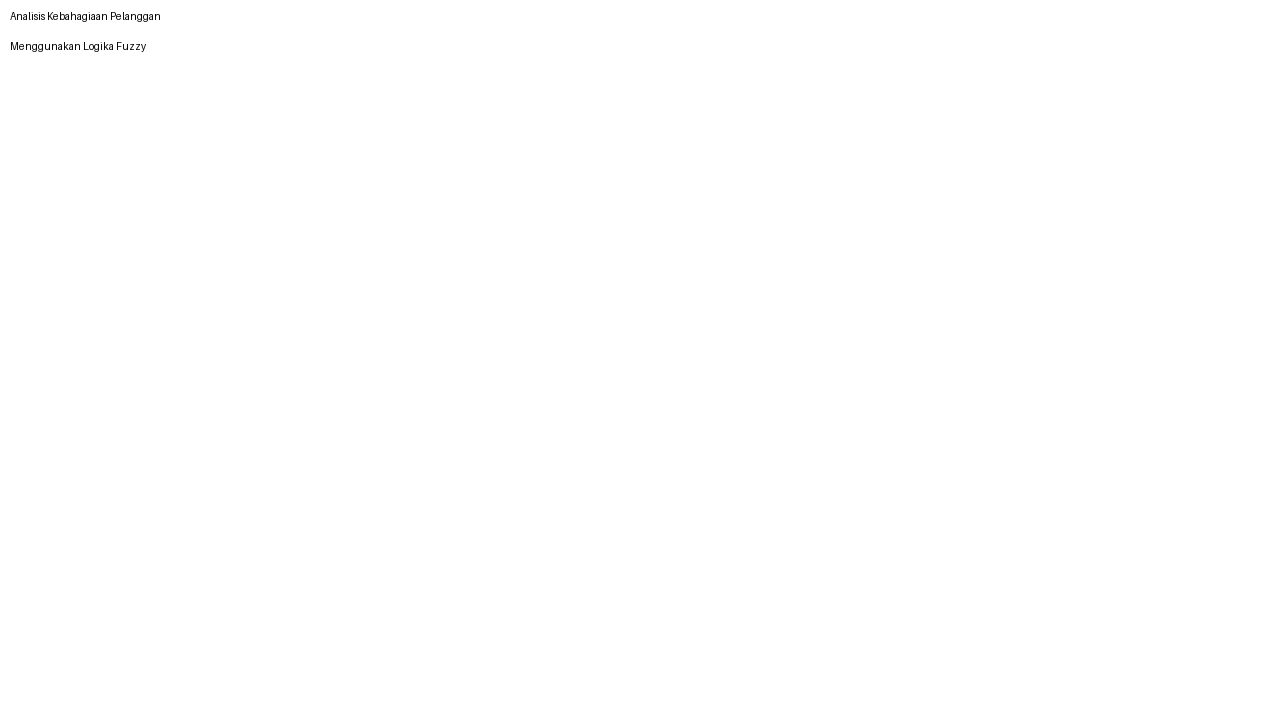

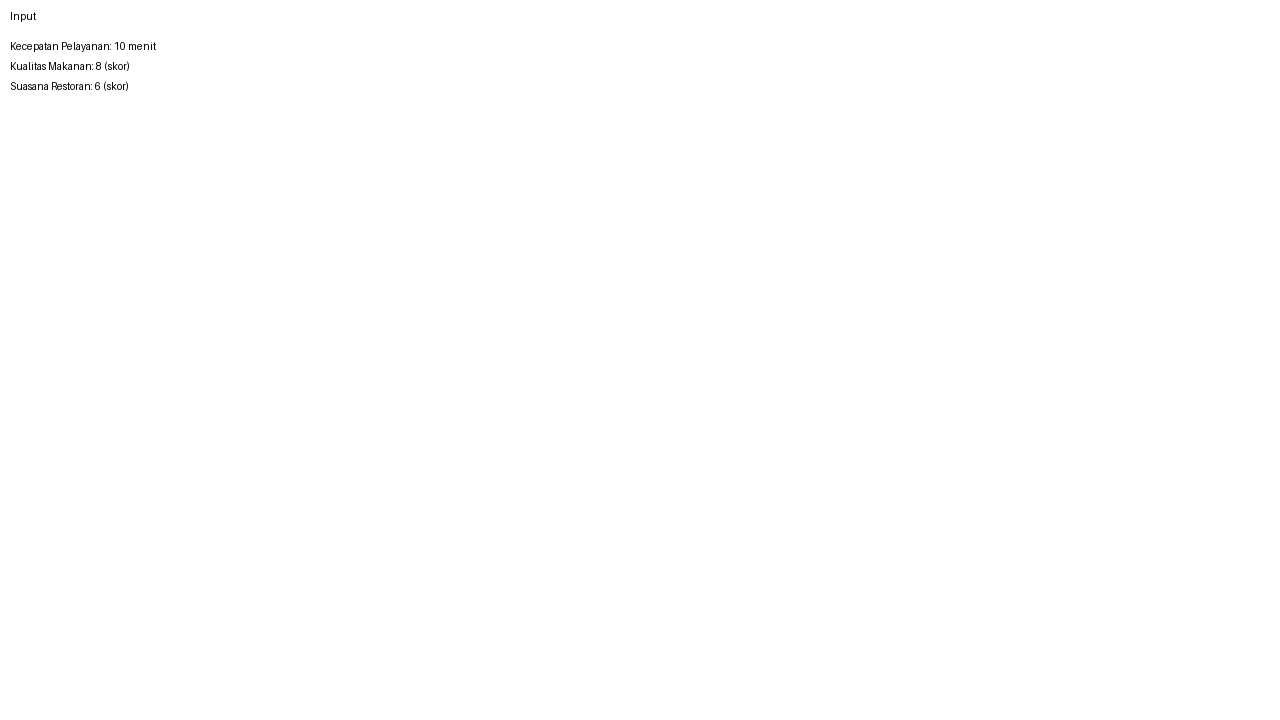

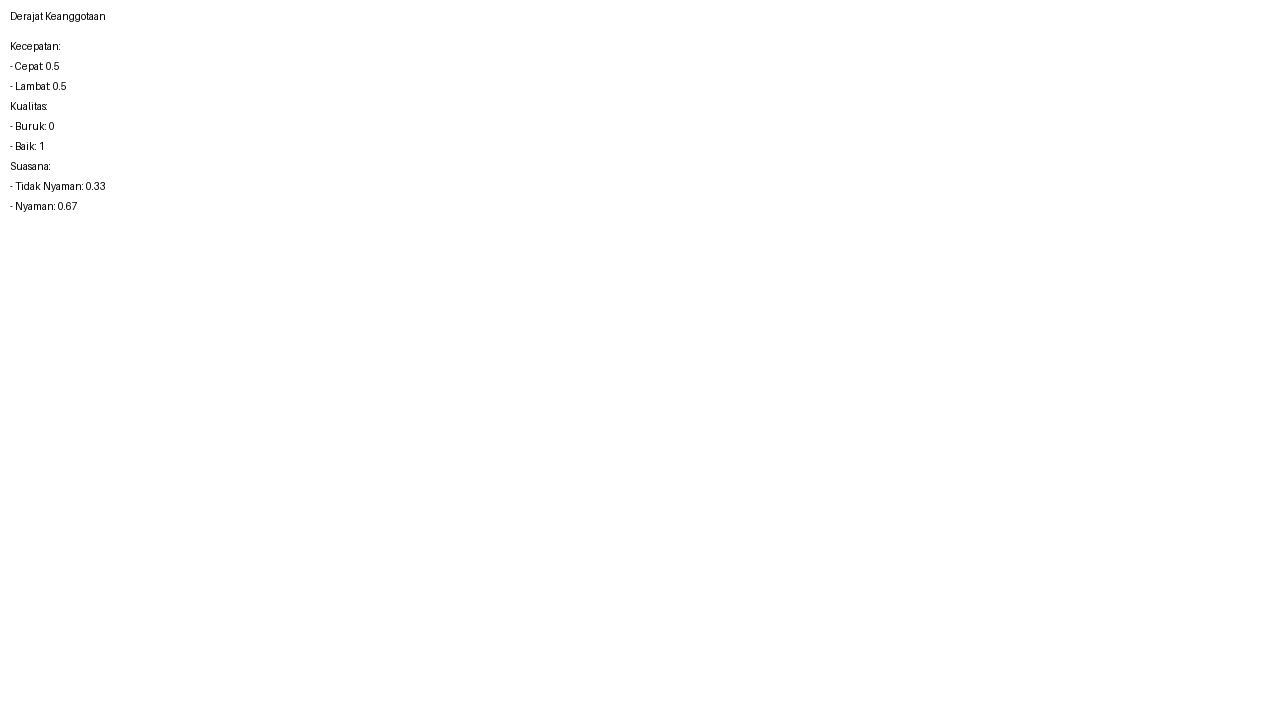

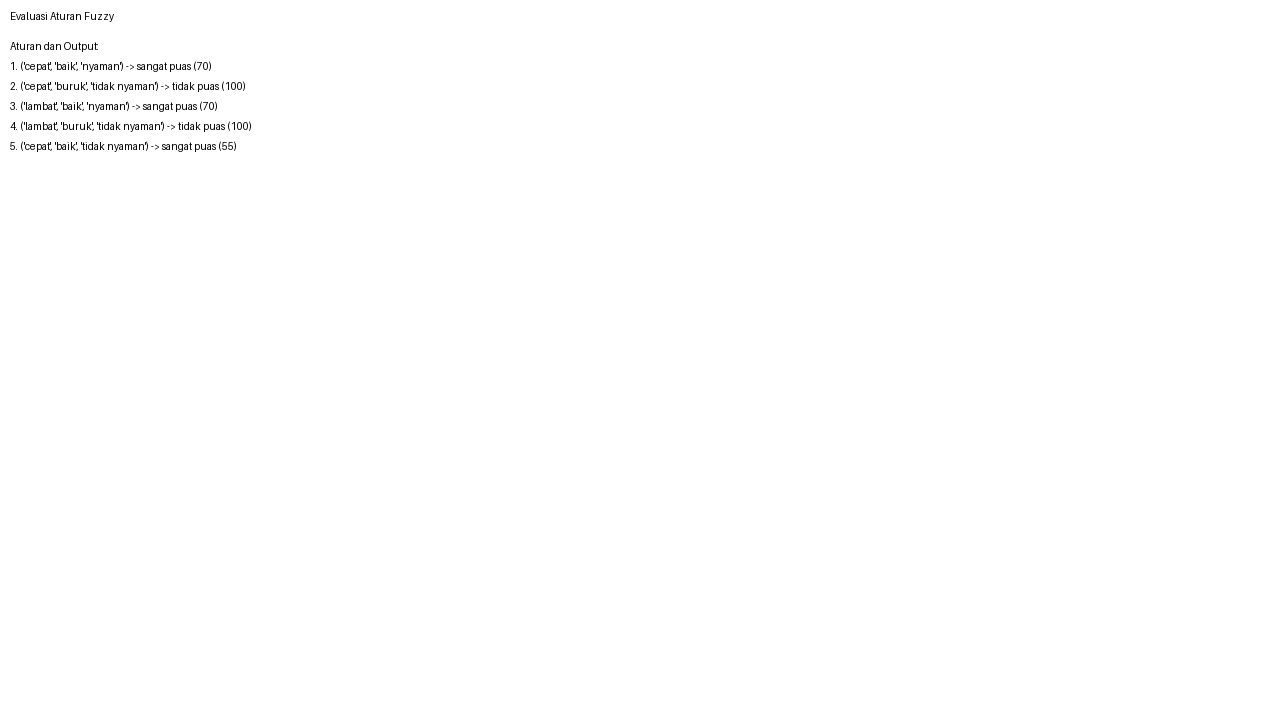

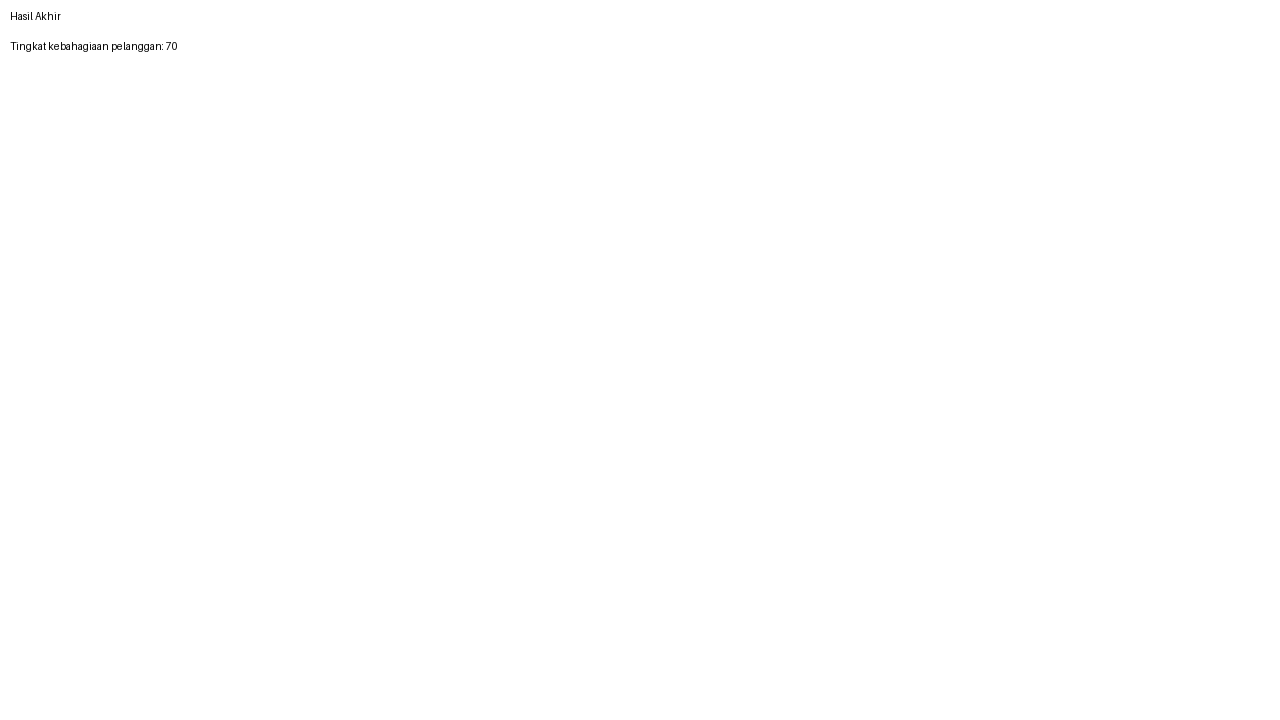

In [23]:
import io
from pptx import Presentation
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Image as IPImage

def ppt_to_images(ppt_path):
    prs = Presentation(ppt_path)
    slide_images = []

    for i, slide in enumerate(prs.slides):
        # Create a blank image with white background
        image = Image.new('RGB', (1280, 720), (255, 255, 255))
        image_draw = ImageDraw.Draw(image)
        font = ImageFont.load_default()

        # Draw slide title
        title_shape = slide.shapes.title
        y_offset = 10
        if title_shape:
            image_draw.text((10, y_offset), title_shape.text, fill=(0, 0, 0), font=font)
            y_offset += 30

        # Draw other text placeholders
        for shape in slide.shapes:
            if shape.has_text_frame and shape != title_shape:
                for paragraph in shape.text_frame.paragraphs:
                    for run in paragraph.runs:
                        image_draw.text((10, y_offset), run.text, fill=(0, 0, 0), font=font)
                        y_offset += 20

        # Save image to a file
        image_path = f"slide_{i+1}.png"
        image.save(image_path)
        slide_images.append(image_path)
    return slide_images

# Extract images from the PowerPoint file
pptx_filename = "Kebahagiaan_Pelanggan.pptx"
slide_images = ppt_to_images(pptx_filename)

# Display images
for img_path in slide_images:
    display(IPImage(filename=img_path))
